# 4. Scipy로 공부하는 확률 변수

## 01장. 이산 확률 분포

## 3. 카테고리 분포

In [20]:
import scipy as sp
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
import matplotlib as mpl
from scipy import stats

In [21]:
mpl.rcParams["font.family"]
mpl.matplotlib_fname()
import matplotlib.font_manager as fm
font_location = "/Library/Fonts/AppleGothic.ttf"
font_name = fm.FontProperties(fname=font_location).get_name()
print(font_name)
mpl.rc('font', family=font_name)

AppleGothic


- - -
### 1. 카테고리 분포

- 베르누이 분포 : 0, 1 둘 중에 하나가 나오는 확률 변수의 분포
- 카테고리 분포 : 1~K 까지의 정수값 중 하나가 나오는 확률 변수의 분포

- 1~K 까지의 정수를 스칼라 값으로 넣는 것이 아니라 one-hot-encoding 방식을 이용해 벡터로 변환 한 후에 변수로 넣게 된다.

- x = 1는 x = (1 0 0 0 0 0) 처럼 변환 된 벡터의 각 요소는 0,1중 하나만 가지는 베르누이 변수의 특성을 가지고 벡터 요소의 총합은 1이라는 조건을 가진다.

- 벡터 x의 각 요소들이 1이 나올 확률을 theta로 가지게 되고 카테고리 갯수만큼 theta값을 가지게 된다. theta는 0부터 1까지의 값을 부여 할 수 있고 총 합은 1이여야 한다.

- K개의 theta값을 설정하면서 각 변수 x가 나올 확률을 배정하는 효과를 지닌다.

In [15]:
%%latex
x와 theta 값은 벡터로 이루어져 있다.
$Cat(x_{1},x_{2},...,x_{k};\theta_{1},\theta_{2},...,\theta{k})$= $Cat(x;\theta)$

<IPython.core.display.Latex object>

- - -
### 2. 카테고리 분포의 모멘트

- 카테고리 분포는 표본값이 벡터이므로 기댓값과 분산도 벡터이다.

In [17]:
%%latex
기댓값 : $E[x_{k}=\theta_{k}]$, 분산 : $Var[x_{k}=\theta_{k}(1-\theta_{k})]$

<IPython.core.display.Latex object>

- - -
### 3. Scipy를 이용한 카테고리 분포의 시뮬레이션
- 카테고리 분포의 클래스 따로 존재하지 않고 다항분포 클래스 `multinomial` 사용하고 횟수를 1로 해준다.

In [32]:
# Fair한 주사위 만들어보기

# 카테고리 분포의 객체를 생성한다.
# theta를 벡터로 만든다.
# multinomial 함수의 횟수 1회와 theta값을 넣어서 각 카테고리 값이 선택 될 확률을 정한다.
theta = np.array([1/6]*6)
theta
rv = sp.stats.multinomial(1, theta)

In [33]:
# one hot encoding 해준다. 1~6까지 나오게 해준다.
xx = np.arange(1,7)
xx_ohe = pd.get_dummies(xx)
xx_ohe

,1,2,3,4,5,6
0,1,0,0,0,0,0
1,0,1,0,0,0,0
2,0,0,1,0,0,0
3,0,0,0,1,0,0
4,0,0,0,0,1,0
5,0,0,0,0,0,1


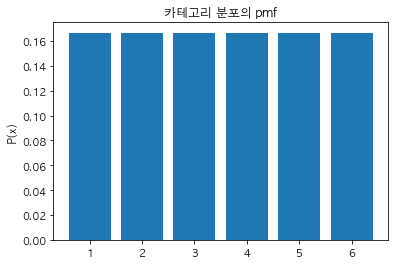

In [34]:
# 카테고리 분포의 pmf 그리기
plt.bar(xx,rv.pmf(xx_ohe))
plt.ylabel("P(x)")
plt.title("카테고리 분포의 pmf")
plt.show()

Fair한 주사위의 카테고리 분포는 모두 동일한 모습을 보인다.

- - -

In [35]:
# 직접 시뮬레이션 해보자
np.random.seed(1)
X = rv.rvs(100)
X[:5]

array([[0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 1],
       [0, 1, 0, 0, 0, 0]])

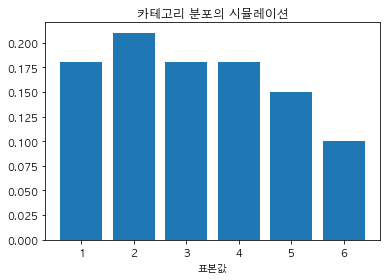

In [37]:
# 시뮬레이션 한 값을 plot으로 나타내보기

y = X.sum(axis=0) / float(len(X))
plt.bar(np.arange(1,7), y)
plt.title("카테고리 분포의 시뮬레이션")
plt.xlabel("표본값")
plt.show()

- - -

In [38]:
# 카테고리 분포의 이상적인 분포와 시뮬레이션 분포를 비교해보자

In [39]:
df = pd.DataFrame({"이론": rv.pmf(xx_ohe), "시뮬레이션": y}, index=np.arange(1, 7)).stack()
df = df.reset_index()
df.columns = ["표본값", "유형", "비율"]
df.pivot("표본값", "유형", "비율")
df

,표본값,유형,비율
0,1,시뮬레이션,0.180000
1,1,이론,0.166667
2,2,시뮬레이션,0.210000
3,2,이론,0.166667
4,3,시뮬레이션,0.180000
5,3,이론,0.166667
6,4,시뮬레이션,0.180000
7,4,이론,0.166667
8,5,시뮬레이션,0.150000
9,5,이론,0.166667


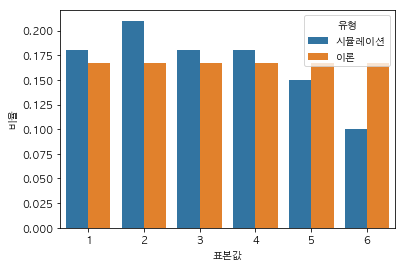

In [40]:
sns.barplot(x="표본값", y="비율", hue="유형", data=df)
plt.show()

- - -
θ를 다른 값으로 실행

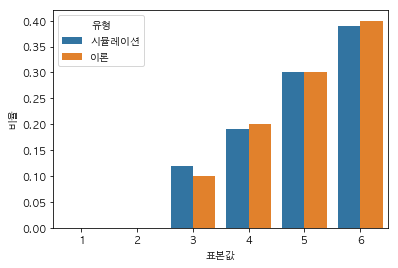

In [41]:
eps = np.finfo(np.float).eps
theta = np.array([eps, eps, 0.1, 0.2, 0.3, 0.4])
rv = sp.stats.multinomial(1, theta)

X = rv.rvs(100, random_state=1)
y = X.sum(axis=0) / float(len(X))

df = pd.DataFrame({"이론": rv.pmf(xx_ohe), "시뮬레이션": y}, index=np.arange(1, 7)).stack()
df = df.reset_index()
df.columns = ["표본값", "유형", "비율"]
df.pivot("표본값", "유형", "비율")
sns.barplot(x="표본값", y="비율", hue="유형", data=df)
plt.show()

In [42]:
# fair한 주사위를 만든 후
# 모델링 해주기 위해서 one hot encoding 해준다.
# 실제로 던져보자 100번 던져서 5개만 뽑아서 본다.
# 각 숫자 나온걸 직접 카운팅 해보면 비교해 볼 수 있다.
# 세타 다른 값으로 실행해보자
# 0이 아닌 가장 작은 값 eps 넣었다. 0 넣으면 에러 나서